In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = '../../Data/Raw/IOT-temp.csv'
data = pd.read_csv(url)
data.columns = ["id", "room_id", "noted_date", "temp", "out/in"]


In [10]:
data

,id,room_id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [11]:
data['simple_id'] = data.index + 1
data["noted_date"] = pd.to_datetime(data["noted_date"])
new_data = data.drop(['id'], axis=1)
new_data = new_data.reindex(columns=["simple_id", "room_id", "noted_date", "temp", "out/in"])

new_data.dropna()
new_data['noted_date'] = pd.to_datetime(new_data.noted_date)
new_data.set_index('noted_date', inplace=True)
data_inside = new_data[new_data['out/in']=='In']
data_outside = new_data[new_data['out/in']=='Out']

In [12]:

data_inside = pd.DataFrame(data_inside)
data_inside = data_inside.sort_values(by="noted_date")
data_inside

,simple_id,room_id,temp,out/in
noted_date,,,,
2018-01-11 00:06:00,16219,Room Admin,32,In
2018-01-11 02:12:00,16187,Room Admin,32,In
2018-01-11 02:44:00,16177,Room Admin,32,In
2018-01-11 02:46:00,16175,Room Admin,32,In
2018-01-11 02:58:00,16168,Room Admin,31,In
...,...,...,...,...
2018-12-10 20:25:00,50724,Room Admin,35,In
2018-12-10 20:35:00,50722,Room Admin,34,In
2018-12-10 20:37:00,50721,Room Admin,35,In


In [13]:
df_outside = pd.DataFrame(data_outside)
df_outside = df_outside.sort_values(by="noted_date")


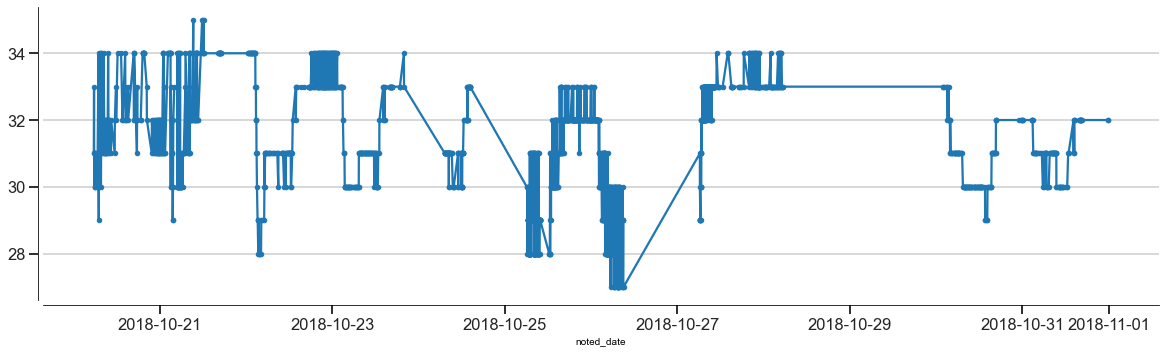

In [14]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")
sns.set_context("talk")

data_inside['temp'].loc['2018-10-20 ':'2018-11-01'].plot(ax=ax, marker='.')
ax.yaxis.grid(True)
sns.despine(offset=5, trim=False)

/var/folders/xn/lm890m517jb7rp9c7kdv82_40000gq/T/ipykernel_45404/298950889.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data_outside['temp'].loc['2018-10-20 ':'2018-11-01'].plot(ax=ax, marker='.')


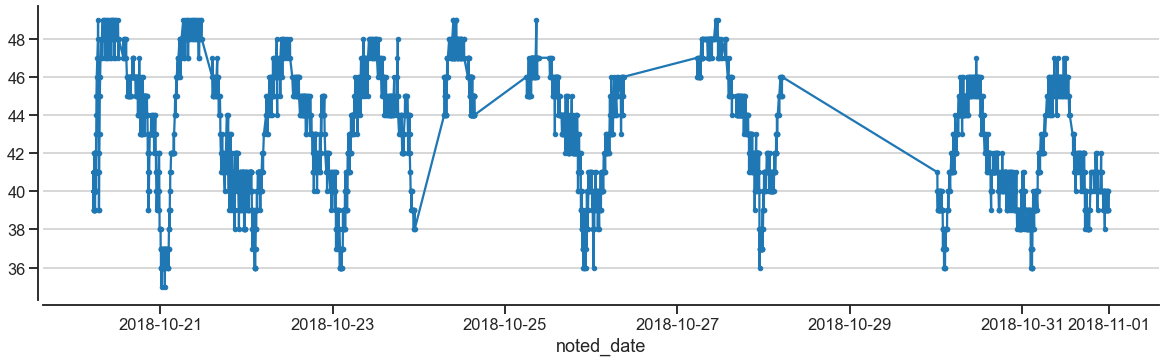

In [15]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")
sns.set_context("talk")

data_outside['temp'].loc['2018-10-20 ':'2018-11-01'].plot(ax=ax, marker='.')
ax.yaxis.grid(True)
sns.despine(offset=5, trim=False)

In [16]:
data_outside.loc['2018-10-20 ':'2018-11-01'].to_csv('../../Data/Processed/out.csv')

data_inside.loc['2018-10-20 ':'2018-11-01'].to_csv('../../Data/Processed/inside.csv')


/var/folders/xn/lm890m517jb7rp9c7kdv82_40000gq/T/ipykernel_45404/4134098032.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data_outside.loc['2018-10-20 ':'2018-11-01'].to_csv('../../Data/Processed/outTest.csv')
